In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_sale = pd.read_csv('sale.csv')

In [3]:
df_sale.head()

,date,SAP code,outlet name,article number,quantity,sales value net,sales value gross
0,2019-05-01,E2570000,Outlet P,1176577,1,32.22,38.99
1,2019-05-01,E2570000,Outlet P,1266543,1,42.14,50.99
2,2019-05-01,E2570000,Outlet P,1269983,1,14.04,16.99
3,2019-05-01,E2570000,Outlet P,1395739,1,25.61,30.99
4,2019-05-01,E2570000,Outlet P,1439351,2,11.56,13.98


In [4]:
df = pd.read_csv('fruithut.csv')

In [5]:
df.head()

,TICKET,UNITS,PRICE,REFERENCE,CODE,NAME,PRICEBUY,PRICESELL,DATENEW,PAYMENT,TOTAL,TRANSID,CATERGORY
0,85e16fbf-ec98-4a03-b5ef-efe731b4f9f9,0.514,2.99,2036,2036.0,Peaches Yellow,0.0,3.99,2016-03-17 10:18:47,cash,6.99956,no ID,Stonefruits
1,85e16fbf-ec98-4a03-b5ef-efe731b4f9f9,0.730,2.99,2036,2036.0,Peaches Yellow,0.0,3.99,2016-03-17 10:18:47,cash,6.99956,no ID,Stonefruits
2,85e16fbf-ec98-4a03-b5ef-efe731b4f9f9,0.164,20.00,1037,1037.0,Garlic loose,0.0,10.00,2016-03-17 10:18:47,cash,6.99956,no ID,Onions
3,d371507f-b8ad-4ab4-b2db-7f73e20acfb3,0.334,2.50,1033,1033.0,Eggplant,0.0,6.99,2016-03-17 10:21:57,cash,4.44880,no ID,Other Vegies
4,d371507f-b8ad-4ab4-b2db-7f73e20acfb3,0.844,1.20,1021,1021.0,Carrots,0.0,1.70,2016-03-17 10:21:57,cash,4.44880,no ID,carrots


In [6]:
cols=df.columns.values

In [7]:
cols_df = pd.DataFrame(data=cols)

In [8]:
cols_df['Col_Num'] = cols_df.index

In [9]:
cols_df

,0,Col_Num
0,TICKET,0
1,UNITS,1
2,PRICE,2
3,REFERENCE,3
4,CODE,4
5,NAME,5
6,PRICEBUY,6
7,PRICESELL,7
8,DATENEW,8
9,PAYMENT,9


In [10]:
date_col = input ("Enter column number for date :") 
date_col = int(date_col)

prodid_col = input ("Enter column number for product id :")
prodid_col = int(prodid_col)

qty_col = input("Enter column number for quantity :")
qty_col = int(qty_col)

unitprice_col = input("Enter column number for quantity :")
unitprice_col = int(unitprice_col)

response_cat = input("Does the dataset contain product category? 1-yes;0-no")
if(response_cat == '1'):
    category_col = input("Enter column number for category: ")
    category_col = int(category_col)
else:
    category_col = 0

Enter column number for date :8
Enter column number for product id :4
Enter column number for quantity :1
Enter column number for quantity :2
Does the dataset contain product category? 1-yes;0-no1
Enter column number for category: 12


In [11]:
#type(prodid_col)

In [12]:
def etl_func(dataset,date_col,prodid_col,qty_col,unitprice_col,category_col):
    if (category_col == 0):
        df = dataset.iloc[: , [date_col, prodid_col,qty_col,unitprice_col]]
        df=df.rename(columns={ df.columns[0]: "date",df.columns[1]: "prod_id",df.columns[2]: "qty",df.columns[3]:"unitprice" })
    else:
        df = dataset.iloc[: , [date_col, prodid_col,qty_col,unitprice_col,category_col]]
        df=df.rename(columns={ df.columns[0]: "date",df.columns[1]: "prod_id",df.columns[2]: "qty",df.columns[3]:"unitprice",df.columns[4]:"category" })
        df['category'] = pd.Categorical(df['category'])
        df['cat_code'] = df.category.cat.codes
        df = df.drop('category', 1)
    df['date']=pd.to_datetime(df['date'])
    return df

In [13]:
df_mod = etl_func(df,date_col,prodid_col,qty_col,unitprice_col,category_col)

In [14]:
df_mod.head()

,date,prod_id,qty,unitprice,cat_code
0,2016-03-17 10:18:47,2036.0,0.514,2.99,34
1,2016-03-17 10:18:47,2036.0,0.730,2.99,34
2,2016-03-17 10:18:47,1037.0,0.164,20.00,25
3,2016-03-17 10:21:57,1033.0,0.334,2.50,27
4,2016-03-17 10:21:57,1021.0,0.844,1.20,39


In [15]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 659197 entries, 0 to 659196
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   date       659197 non-null  datetime64[ns]
 1   prod_id    659197 non-null  float64       
 2   qty        659197 non-null  float64       
 3   unitprice  659197 non-null  float64       
 4   cat_code   659197 non-null  int8          
dtypes: datetime64[ns](1), float64(3), int8(1)
memory usage: 20.7 MB


In [16]:
df_price = df_mod[['prod_id','unitprice']].copy()

In [17]:
df_price.head()

,prod_id,unitprice
0,2036.0,2.99
1,2036.0,2.99
2,1037.0,20.00
3,1033.0,2.50
4,1021.0,1.20


In [18]:
df_price=df_price.sort_values("prod_id")

In [19]:
df_price.drop_duplicates(subset ="prod_id", 
                     keep = False, inplace = True) 

In [20]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 19228 to 54948
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   prod_id    21 non-null     float64
 1   unitprice  21 non-null     float64
dtypes: float64(2)
memory usage: 504.0 bytes


In [21]:
df_mod['prod_id']=df_mod['prod_id'].astype('Int64').astype('str')

In [22]:
df_mod['cat_code']=df_mod['cat_code'].astype('str')

In [23]:
#df['date'] = pd.to_datetime(df['date'])

In [24]:
#df.info()

In [25]:
#df.shape

In [26]:
#df['article number'].nunique()

In [27]:
#df.isnull().sum()

In [28]:
#df_mod = df[['date', 'article number', 'quantity','sales value net']].copy()

In [29]:
#df_mod.head()

In [30]:
df_mod1 = df_mod

In [31]:
df_mod1

,date,prod_id,qty,unitprice,cat_code
0,2016-03-17 10:18:47,2036,0.514,2.99,34
1,2016-03-17 10:18:47,2036,0.730,2.99,34
2,2016-03-17 10:18:47,1037,0.164,20.00,25
3,2016-03-17 10:21:57,1033,0.334,2.50,27
4,2016-03-17 10:21:57,1021,0.844,1.20,39
...,...,...,...,...,...
659192,2019-10-13 17:41:45,4793000091012,1.000,3.99,33
659193,2019-10-13 17:41:45,2010,1.042,3.50,3
659194,2019-10-13 17:41:45,9332102000000,1.000,3.00,35
659195,2019-10-13 17:43:20,1063,0.382,2.50,25


In [32]:
df_mod1 = df_mod1.groupby(['prod_id','cat_code','unitprice','date']).agg({'qty':'sum'})

In [33]:
df_mod1.head()

qty
prod_id cat_code unitprice date                    
1001    5        0.90      2018-06-12 09:25:44  1.0
                 0.98      2016-04-05 05:00:29  1.0
                 0.99      2017-10-07 15:03:33  2.0
                           2017-10-08 11:53:07  1.0
                           2017-10-20 12:55:00  2.0

In [34]:
df_mod1.to_csv('Summarised.csv')

In [35]:
df = pd.read_csv('Summarised.csv')

In [36]:
df.head()

,prod_id,cat_code,unitprice,date,qty
0,1001,5,0.90,2018-06-12 09:25:44,1.0
1,1001,5,0.98,2016-04-05 05:00:29,1.0
2,1001,5,0.99,2017-10-07 15:03:33,2.0
3,1001,5,0.99,2017-10-08 11:53:07,1.0
4,1001,5,0.99,2017-10-20 12:55:00,2.0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653714 entries, 0 to 653713
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   prod_id    653714 non-null  int64  
 1   cat_code   653714 non-null  int64  
 2   unitprice  653714 non-null  float64
 3   date       653714 non-null  object 
 4   qty        653714 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 24.9+ MB


In [38]:
#group by product ids for each day
#df_mod = df_mod.groupby(['prod_id','date']).agg({'qty':'sum'})


In [39]:
#df_mod

In [40]:
#df_mod = df_mod.to_frame()

In [41]:
#df_mod.to_csv('sale1.csv')

In [42]:
#df_mod=pd.read_csv('sale1.csv')

In [43]:
#df_mod.rename(columns={'article number': 'productid'}, inplace=True)

In [44]:
df_mod = df

In [45]:
df_mod['date'] = pd.to_datetime(df_mod['date'])
#df_mod = df_mod.set_index('date')

In [46]:
df_mod.head()

,prod_id,cat_code,unitprice,date,qty
0,1001,5,0.90,2018-06-12 09:25:44,1.0
1,1001,5,0.98,2016-04-05 05:00:29,1.0
2,1001,5,0.99,2017-10-07 15:03:33,2.0
3,1001,5,0.99,2017-10-08 11:53:07,1.0
4,1001,5,0.99,2017-10-20 12:55:00,2.0


Text(0, 0.5, 'quantity')

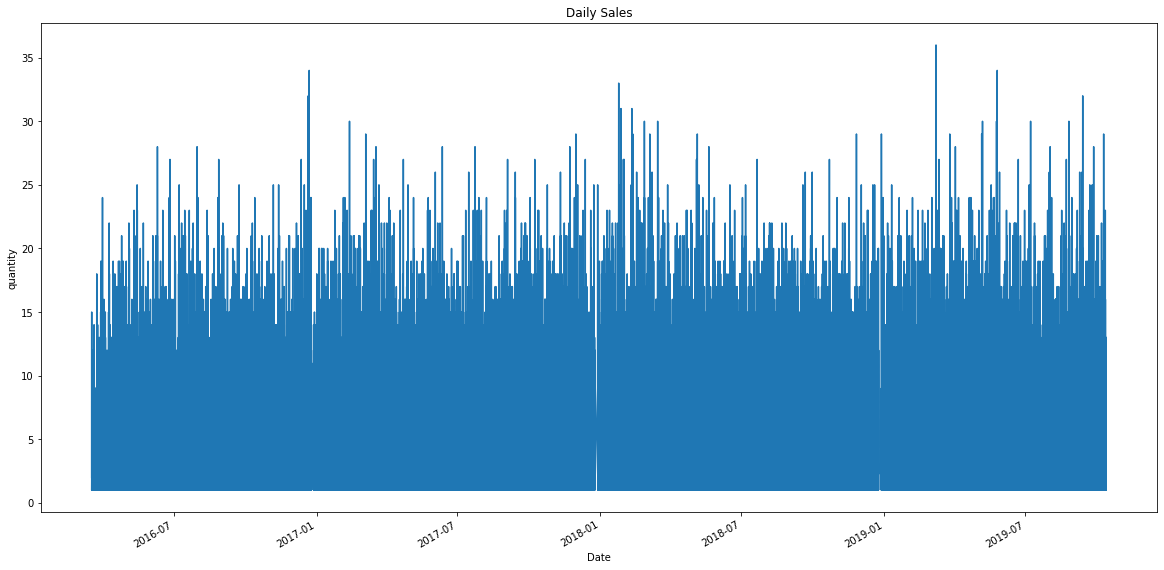

In [47]:
plt.figure(figsize=(20,10))
sales_by_day = df_mod.groupby('date').size()
plot_by_day = sales_by_day.plot(title='Daily Sales')
plot_by_day.set_xlabel('Date')
plot_by_day.set_ylabel('quantity')

count    653714.000000
mean          0.911917
std           0.796049
min          -1.000000
25%           0.454000
50%           1.000000
75%           1.000000
max          48.000000
Name: qty, dtype: float64


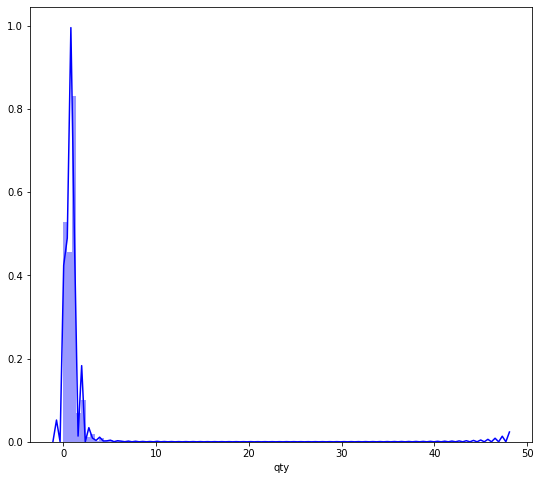

In [48]:
print(df_mod['qty'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df_mod['qty'], color='b', bins=100, hist_kws={'alpha': 0.4})

In [49]:
#df_mod['unit_price']=df_mod['sales value net']/df_mod['quantity']

In [50]:
#df_mod = df_mod.drop('sales value net', 1)

In [51]:
df_mod.head()

,prod_id,cat_code,unitprice,date,qty
0,1001,5,0.90,2018-06-12 09:25:44,1.0
1,1001,5,0.98,2016-04-05 05:00:29,1.0
2,1001,5,0.99,2017-10-07 15:03:33,2.0
3,1001,5,0.99,2017-10-08 11:53:07,1.0
4,1001,5,0.99,2017-10-20 12:55:00,2.0


In [52]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653714 entries, 0 to 653713
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   prod_id    653714 non-null  int64         
 1   cat_code   653714 non-null  int64         
 2   unitprice  653714 non-null  float64       
 3   date       653714 non-null  datetime64[ns]
 4   qty        653714 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 24.9 MB


In [53]:
def fun_extract_feat(df1):
    #df1['date'] = df1.index
    #df1['new_date'] = [d.date() for d in df1['date']]
    #df1['new_time'] = [d.time() for d in df1['date']]
    df1['year'] = df1['date'].dt.year
    df1['dayofweek'] = df1['date'].dt.dayofweek
    df1['quarter'] = df1['date'].dt.quarter
    df1['month'] = df1['date'].dt.month
    df1['dayofyear'] = df1['date'].dt.dayofyear
    df1['dayofmonth'] = df1['date'].dt.day
    df1['weekofyear'] = df1['date'].dt.weekofyear
    df1['hourofday'] = df1['date'].dt.hour
    df1['minofday'] = df1['date'].dt.minute
    
    df1['is_month_end']=df1['date'].dt.is_month_end
    df1['is_month_start']=df1['date'].dt.is_month_start
    df1['is_year_start']=df1['date'].dt.is_month_start
    df1['is_year_end']=df1['date'].dt.is_month_start
    
    
    
    return df1

In [54]:
df_mod=fun_extract_feat(df_mod)
df_mod['is_month_end']=df_mod['is_month_end'].astype(int)
df_mod['is_month_start']=df_mod['is_month_end'].astype(int)
df_mod['is_year_start']=df_mod['is_month_end'].astype(int)
df_mod['is_year_end']=df_mod['is_month_end'].astype(int)

In [55]:
df_mod_wd=df_mod.drop(['date'], axis=1)

In [56]:
df_mod_wd.head()

,prod_id,cat_code,unitprice,qty,year,dayofweek,quarter,month,dayofyear,dayofmonth,weekofyear,hourofday,minofday,is_month_end,is_month_start,is_year_start,is_year_end
0,1001,5,0.90,1.0,2018,1,2,6,163,12,24,9,25,0,0,0,0
1,1001,5,0.98,1.0,2016,1,2,4,96,5,14,5,0,0,0,0,0
2,1001,5,0.99,2.0,2017,5,4,10,280,7,40,15,3,0,0,0,0
3,1001,5,0.99,1.0,2017,6,4,10,281,8,40,11,53,0,0,0,0
4,1001,5,0.99,2.0,2017,4,4,10,293,20,42,12,55,0,0,0,0


In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_mod_scaled = scaler.fit_transform(df_mod_wd)

In [58]:
from sklearn.cluster import KMeans

In [156]:
#determine number of clusters
# fitting multiple k-means algorithms and storing the values in an empty list
def optimal_num_clusters(df1_scaled):
    SSE = []
    for cluster in range(1,20):
        kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
        kmeans.fit(df1_scaled)
        SSE.append(kmeans.inertia_)

    # converting the results into a dataframe and plotting them
    frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
    plt.figure(figsize=(12,6))
    plt.plot(frame['Cluster'], frame['SSE'], marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Inertia')

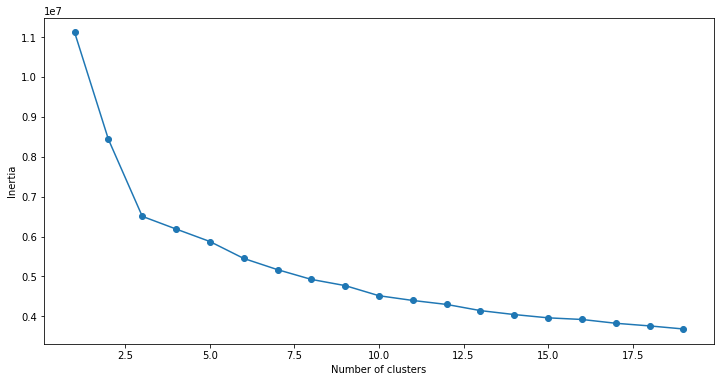

In [157]:
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.cluster import KMeans
optimal_num_clusters(df_mod_scaled)

In [61]:
# k means using 6 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 3, init='k-means++')
kmeans.fit(df_mod_scaled)
pred = kmeans.predict(df_mod_scaled)
frame = pd.DataFrame(df_mod_scaled)
frame['cluster'] = pred

In [62]:
frame.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,cluster
0,-0.045571,-1.21485,-0.869936,0.110650,0.545703,-1.018022,-0.445341,-0.129933,-0.169904,-0.415956,-0.142716,-0.456352,-0.260708,-0.187349,-0.187349,-0.187349,-0.187349,0
1,-0.045571,-1.21485,-0.845940,0.110650,-1.351645,-1.018022,-0.445341,-0.729898,-0.827889,-1.215267,-0.833057,-1.115429,-1.702029,-0.187349,-0.187349,-0.187349,-0.187349,0
2,-0.045571,-1.21485,-0.842940,1.366854,-0.402971,1.030114,1.397255,1.069996,0.979113,-0.986892,0.961830,0.532263,-1.529071,-0.187349,-0.187349,-0.187349,-0.187349,2
3,-0.045571,-1.21485,-0.842940,0.110650,-0.402971,1.542149,1.397255,1.069996,0.988934,-0.872705,0.961830,-0.126814,1.353572,-0.187349,-0.187349,-0.187349,-0.187349,2
4,-0.045571,-1.21485,-0.842940,1.366854,-0.402971,0.518080,1.397255,1.069996,1.106782,0.497541,1.099898,0.037955,1.468878,-0.187349,-0.187349,-0.187349,-0.187349,2


In [63]:
df_mod_wd = df_mod_wd.merge(frame, left_index=True, right_index=True)

In [64]:
df_mod_wd.head()

,prod_id,cat_code,unitprice,qty,year,dayofweek,quarter,month,dayofyear,dayofmonth,...,8,9,10,11,12,13,14,15,16,cluster
0,1001,5,0.90,1.0,2018,1,2,6,163,12,...,-0.169904,-0.415956,-0.142716,-0.456352,-0.260708,-0.187349,-0.187349,-0.187349,-0.187349,0
1,1001,5,0.98,1.0,2016,1,2,4,96,5,...,-0.827889,-1.215267,-0.833057,-1.115429,-1.702029,-0.187349,-0.187349,-0.187349,-0.187349,0
2,1001,5,0.99,2.0,2017,5,4,10,280,7,...,0.979113,-0.986892,0.961830,0.532263,-1.529071,-0.187349,-0.187349,-0.187349,-0.187349,2
3,1001,5,0.99,1.0,2017,6,4,10,281,8,...,0.988934,-0.872705,0.961830,-0.126814,1.353572,-0.187349,-0.187349,-0.187349,-0.187349,2
4,1001,5,0.99,2.0,2017,4,4,10,293,20,...,1.106782,0.497541,1.099898,0.037955,1.468878,-0.187349,-0.187349,-0.187349,-0.187349,2


In [65]:
df_mod_wd = df_mod_wd.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], axis=1)

In [66]:
#df_mod_wd.rename(columns={
#                    1: 'qty_scaled',
#                   2: 'sales_value_net_scaled',
#                   3: 'year_scaled',
#                   4: 'dayofweek_scaled',
#                   5: 'quarter_scaled',
#                   6: 'month_scaled',
#                   7: 'dayofyear_scaled',
#                   8: 'dayofmonth_scaled',
#                   9: 'weekofyear_scaled',
#                   10: 'is_month_end_scaled',
#                   11: 'is_month_start_scaled',
#                   12: 'is_year_start_scaled',
#                   13: 'is_year_end'
#                  }, inplace=True)

In [67]:
#df_mod_wd = df_mod_wd.drop(['quantity','sales value net','year','dayofweek','quarter',
#                 'month','dayofyear','dayofmonth','weekofyear','is_month_end','is_month_start',
#                 'is_year_start','is_year_end',0], axis=1)

In [68]:
df_mod_wd.head()

,prod_id,cat_code,unitprice,qty,year,dayofweek,quarter,month,dayofyear,dayofmonth,weekofyear,hourofday,minofday,is_month_end,is_month_start,is_year_start,is_year_end,cluster
0,1001,5,0.90,1.0,2018,1,2,6,163,12,24,9,25,0,0,0,0,0
1,1001,5,0.98,1.0,2016,1,2,4,96,5,14,5,0,0,0,0,0,0
2,1001,5,0.99,2.0,2017,5,4,10,280,7,40,15,3,0,0,0,0,2
3,1001,5,0.99,1.0,2017,6,4,10,281,8,40,11,53,0,0,0,0,2
4,1001,5,0.99,2.0,2017,4,4,10,293,20,42,12,55,0,0,0,0,2


In [69]:
df_mod = df_mod.merge(df_mod_wd, left_index=True, right_index=True)

In [70]:
df_mod.head()

,prod_id_x,cat_code_x,unitprice_x,date,qty_x,year_x,dayofweek_x,quarter_x,month_x,dayofyear_x,...,dayofyear_y,dayofmonth_y,weekofyear_y,hourofday_y,minofday_y,is_month_end_y,is_month_start_y,is_year_start_y,is_year_end_y,cluster
0,1001,5,0.90,2018-06-12 09:25:44,1.0,2018,1,2,6,163,...,163,12,24,9,25,0,0,0,0,0
1,1001,5,0.98,2016-04-05 05:00:29,1.0,2016,1,2,4,96,...,96,5,14,5,0,0,0,0,0,0
2,1001,5,0.99,2017-10-07 15:03:33,2.0,2017,5,4,10,280,...,280,7,40,15,3,0,0,0,0,2
3,1001,5,0.99,2017-10-08 11:53:07,1.0,2017,6,4,10,281,...,281,8,40,11,53,0,0,0,0,2
4,1001,5,0.99,2017-10-20 12:55:00,2.0,2017,4,4,10,293,...,293,20,42,12,55,0,0,0,0,2


In [71]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653714 entries, 0 to 653713
Data columns (total 36 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   prod_id_x         653714 non-null  int64         
 1   cat_code_x        653714 non-null  int64         
 2   unitprice_x       653714 non-null  float64       
 3   date              653714 non-null  datetime64[ns]
 4   qty_x             653714 non-null  float64       
 5   year_x            653714 non-null  int64         
 6   dayofweek_x       653714 non-null  int64         
 7   quarter_x         653714 non-null  int64         
 8   month_x           653714 non-null  int64         
 9   dayofyear_x       653714 non-null  int64         
 10  dayofmonth_x      653714 non-null  int64         
 11  weekofyear_x      653714 non-null  int64         
 12  hourofday_x       653714 non-null  int64         
 13  minofday_x        653714 non-null  int64         
 14  is_m

In [72]:
df_mod = df_mod.drop(['prod_id_y','cat_code_y','unitprice_y','qty_y','year_y','dayofweek_y',
                 'quarter_y','month_y','dayofyear_y','dayofmonth_y','weekofyear_y','hourofday_y','is_month_end_y',
                      'is_month_start_y','is_year_start_y','is_year_end_y'], axis=1)

In [73]:
df_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653714 entries, 0 to 653713
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   prod_id_x         653714 non-null  int64         
 1   cat_code_x        653714 non-null  int64         
 2   unitprice_x       653714 non-null  float64       
 3   date              653714 non-null  datetime64[ns]
 4   qty_x             653714 non-null  float64       
 5   year_x            653714 non-null  int64         
 6   dayofweek_x       653714 non-null  int64         
 7   quarter_x         653714 non-null  int64         
 8   month_x           653714 non-null  int64         
 9   dayofyear_x       653714 non-null  int64         
 10  dayofmonth_x      653714 non-null  int64         
 11  weekofyear_x      653714 non-null  int64         
 12  hourofday_x       653714 non-null  int64         
 13  minofday_x        653714 non-null  int64         
 14  is_m

In [74]:
df_mod = df_mod.sort_values(by='date')

In [75]:
df_mod.head()

,prod_id_x,cat_code_x,unitprice_x,date,qty_x,year_x,dayofweek_x,quarter_x,month_x,dayofyear_x,dayofmonth_x,weekofyear_x,hourofday_x,minofday_x,is_month_end_x,is_month_start_x,is_year_start_x,is_year_end_x,minofday_y,cluster
442401,2036,34,2.99,2016-03-17 10:18:47,1.244,2016,3,1,3,77,17,11,10,18,0,0,0,0,18,0
104535,1037,25,20.00,2016-03-17 10:18:47,0.164,2016,3,1,3,77,17,11,10,18,0,0,0,0,18,0
45819,1021,39,1.20,2016-03-17 10:21:57,0.844,2016,3,1,3,77,17,11,10,21,0,0,0,0,21,0
104536,1037,25,20.00,2016-03-17 10:21:57,0.072,2016,3,1,3,77,17,11,10,21,0,0,0,0,21,0
88129,1033,27,2.50,2016-03-17 10:21:57,0.334,2016,3,1,3,77,17,11,10,21,0,0,0,0,21,0


In [76]:
split_date = pd.datetime(2019,1,1)
df_train = df_mod.loc[df_mod['date'] <= split_date]
df_test = df_mod.loc[df_mod['date']> split_date]

C:\Users\primu\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


In [77]:
df_train.head()

,prod_id_x,cat_code_x,unitprice_x,date,qty_x,year_x,dayofweek_x,quarter_x,month_x,dayofyear_x,dayofmonth_x,weekofyear_x,hourofday_x,minofday_x,is_month_end_x,is_month_start_x,is_year_start_x,is_year_end_x,minofday_y,cluster
442401,2036,34,2.99,2016-03-17 10:18:47,1.244,2016,3,1,3,77,17,11,10,18,0,0,0,0,18,0
104535,1037,25,20.00,2016-03-17 10:18:47,0.164,2016,3,1,3,77,17,11,10,18,0,0,0,0,18,0
45819,1021,39,1.20,2016-03-17 10:21:57,0.844,2016,3,1,3,77,17,11,10,21,0,0,0,0,21,0
104536,1037,25,20.00,2016-03-17 10:21:57,0.072,2016,3,1,3,77,17,11,10,21,0,0,0,0,21,0
88129,1033,27,2.50,2016-03-17 10:21:57,0.334,2016,3,1,3,77,17,11,10,21,0,0,0,0,21,0


In [78]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 525008 entries, 442401 to 99284
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   prod_id_x         525008 non-null  int64         
 1   cat_code_x        525008 non-null  int64         
 2   unitprice_x       525008 non-null  float64       
 3   date              525008 non-null  datetime64[ns]
 4   qty_x             525008 non-null  float64       
 5   year_x            525008 non-null  int64         
 6   dayofweek_x       525008 non-null  int64         
 7   quarter_x         525008 non-null  int64         
 8   month_x           525008 non-null  int64         
 9   dayofyear_x       525008 non-null  int64         
 10  dayofmonth_x      525008 non-null  int64         
 11  weekofyear_x      525008 non-null  int64         
 12  hourofday_x       525008 non-null  int64         
 13  minofday_x        525008 non-null  int64         
 14  

In [79]:
#df_train['is_month_end']=df_train['is_month_end'].astype(int)
#df_train['is_month_start']=df_train['is_month_end'].astype(int)
#df_train['is_year_start']=df_train['is_month_end'].astype(int)
#df_train['is_year_end']=df_train['is_month_end'].astype(int)

#df_test['is_month_end']=df_test['is_month_end'].astype(int)
#df_test['is_month_start']=df_test['is_month_end'].astype(int)
#df_test['is_year_start']=df_test['is_month_end'].astype(int)
#df_test['is_year_end']=df_test['is_month_end'].astype(int)

In [80]:
df_train.head()

,prod_id_x,cat_code_x,unitprice_x,date,qty_x,year_x,dayofweek_x,quarter_x,month_x,dayofyear_x,dayofmonth_x,weekofyear_x,hourofday_x,minofday_x,is_month_end_x,is_month_start_x,is_year_start_x,is_year_end_x,minofday_y,cluster
442401,2036,34,2.99,2016-03-17 10:18:47,1.244,2016,3,1,3,77,17,11,10,18,0,0,0,0,18,0
104535,1037,25,20.00,2016-03-17 10:18:47,0.164,2016,3,1,3,77,17,11,10,18,0,0,0,0,18,0
45819,1021,39,1.20,2016-03-17 10:21:57,0.844,2016,3,1,3,77,17,11,10,21,0,0,0,0,21,0
104536,1037,25,20.00,2016-03-17 10:21:57,0.072,2016,3,1,3,77,17,11,10,21,0,0,0,0,21,0
88129,1033,27,2.50,2016-03-17 10:21:57,0.334,2016,3,1,3,77,17,11,10,21,0,0,0,0,21,0


In [81]:
df_train.shape

(525008, 20)

In [82]:
df_test.shape

(128706, 20)

In [83]:
df_train.head()

,prod_id_x,cat_code_x,unitprice_x,date,qty_x,year_x,dayofweek_x,quarter_x,month_x,dayofyear_x,dayofmonth_x,weekofyear_x,hourofday_x,minofday_x,is_month_end_x,is_month_start_x,is_year_start_x,is_year_end_x,minofday_y,cluster
442401,2036,34,2.99,2016-03-17 10:18:47,1.244,2016,3,1,3,77,17,11,10,18,0,0,0,0,18,0
104535,1037,25,20.00,2016-03-17 10:18:47,0.164,2016,3,1,3,77,17,11,10,18,0,0,0,0,18,0
45819,1021,39,1.20,2016-03-17 10:21:57,0.844,2016,3,1,3,77,17,11,10,21,0,0,0,0,21,0
104536,1037,25,20.00,2016-03-17 10:21:57,0.072,2016,3,1,3,77,17,11,10,21,0,0,0,0,21,0
88129,1033,27,2.50,2016-03-17 10:21:57,0.334,2016,3,1,3,77,17,11,10,21,0,0,0,0,21,0


In [84]:
df_test.head()

,prod_id_x,cat_code_x,unitprice_x,date,qty_x,year_x,dayofweek_x,quarter_x,month_x,dayofyear_x,dayofmonth_x,weekofyear_x,hourofday_x,minofday_x,is_month_end_x,is_month_start_x,is_year_start_x,is_year_end_x,minofday_y,cluster
379595,2010,3,1.99,2019-01-02 08:09:57,1.980,2019,2,1,1,2,2,1,8,9,0,0,0,0,9,0
379596,2010,3,1.99,2019-01-02 08:34:09,1.082,2019,2,1,1,2,2,1,8,34,0,0,0,0,34,0
552516,4029,34,2.99,2019-01-02 08:34:09,0.710,2019,2,1,1,2,2,1,8,34,0,0,0,0,34,0
344977,2003,0,1.99,2019-01-02 08:34:09,1.822,2019,2,1,1,2,2,1,8,34,0,0,0,0,34,0
250429,1113,35,2.99,2019-01-02 08:34:09,0.718,2019,2,1,1,2,2,1,8,34,0,0,0,0,34,0


In [85]:

col=['prod_id_x','cat_code_x','unitprice_x','qty_x','year_x','dayofweek_x',
                 'quarter_x','month_x','dayofyear_x','dayofmonth_x','weekofyear_x','hourofday_x','is_month_end_x',
                      'is_month_start_x','is_year_start_x','is_year_end_x','date']

In [86]:
print(df_train.duplicated(subset=col).value_counts())

False    525008
dtype: int64


In [87]:
print(df_test.duplicated(subset=col).value_counts())

False    128706
dtype: int64


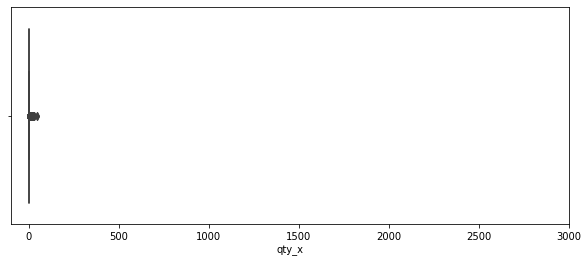

In [88]:
plt.figure(figsize=(10,4))
plt.xlim(-100, 3000)
sns.boxplot(x=df_train['qty_x']) 

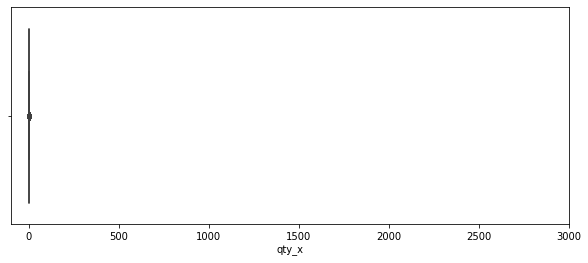

In [89]:
#Using z-score to remove outliers
import scipy
from scipy.stats import zscore
df_train = df_train[(np.abs(scipy.stats.zscore(df_train.drop(['prod_id_x','cat_code_x','unitprice_x','year_x','dayofweek_x',
                 'quarter_x','month_x','dayofyear_x','dayofmonth_x','weekofyear_x','hourofday_x','is_month_end_x',
                      'is_month_start_x','is_year_start_x','is_year_end_x','date'], axis=1))) < 3).all(axis=1)]
plt.figure(figsize=(10,4))
plt.xlim(-100, 3000)
sns.boxplot(x=df_train['qty_x']) 

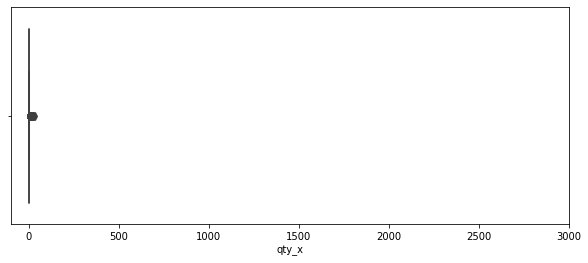

In [90]:
plt.figure(figsize=(10,4))
plt.xlim(-100, 3000)
sns.boxplot(x=df_test['qty_x']) 

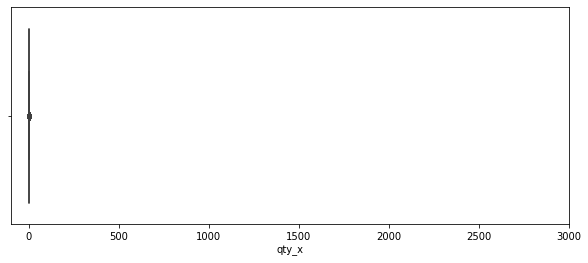

In [91]:
#Using z-score to remove outliers
import scipy
from scipy.stats import zscore
df_test = df_test[(np.abs(scipy.stats.zscore(df_test.drop(['prod_id_x','cat_code_x','unitprice_x','year_x','dayofweek_x',
                 'quarter_x','month_x','dayofyear_x','dayofmonth_x','weekofyear_x','hourofday_x','is_month_end_x',
                      'is_month_start_x','is_year_start_x','is_year_end_x','date'], axis=1))) < 3).all(axis=1)]
plt.figure(figsize=(10,4))
plt.xlim(-100, 3000)
sns.boxplot(x=df_test['qty_x']) 

In [92]:
df_train=df_train.set_index('date')
df_test=df_test.set_index('date')

In [93]:
#This is being done to check if there are product ids in the test dataset that are not in the training data set. 
print("new items in test(in test but not in train):",len(list(set(df_test.prod_id_x) - set(df_test.prod_id_x).intersection(set(df_train.prod_id_x)))))

new items in test(in test but not in train): 29


In [94]:
#Ensure the training data set and test data set contain the same product ids
test_products = df_test.prod_id_x.unique()
df_train = df_train[df_train.prod_id_x.isin(test_products)]

In [95]:
df_train.shape

(502975, 19)

In [96]:
df_test.shape

(127304, 19)

In [97]:
#df_train.info()

In [98]:
#df_train.rename(columns={0: 'qty_scaled'}, inplace=True)

In [99]:
df_train.tail()

,prod_id_x,cat_code_x,unitprice_x,qty_x,year_x,dayofweek_x,quarter_x,month_x,dayofyear_x,dayofmonth_x,weekofyear_x,hourofday_x,minofday_x,is_month_end_x,is_month_start_x,is_year_start_x,is_year_end_x,minofday_y,cluster
date,,,,,,,,,,,,,,,,,,,
2018-12-31 19:02:56,1232,25,3.40,1.000,2018,0,4,12,365,31,1,19,2,1,1,1,1,2,1
2018-12-31 19:02:56,3010,17,2.00,1.000,2018,0,4,12,365,31,1,19,2,1,1,1,1,2,1
2018-12-31 19:12:13,1063,25,2.50,0.740,2018,0,4,12,365,31,1,19,12,1,1,1,1,12,1
2018-12-31 19:12:13,1039,27,9.99,0.054,2018,0,4,12,365,31,1,19,12,1,1,1,1,12,1
2018-12-31 19:12:13,1037,25,7.99,0.074,2018,0,4,12,365,31,1,19,12,1,1,1,1,12,1


In [100]:
#Separate x variables and y variables
x_train = df_train.drop(['qty_x'], axis=1)
y_train = df_train['qty_x']

x_test = df_test.drop(['qty_x'], axis=1)
y_test = df_test['qty_x']

In [101]:
x_train.head()

,prod_id_x,cat_code_x,unitprice_x,year_x,dayofweek_x,quarter_x,month_x,dayofyear_x,dayofmonth_x,weekofyear_x,hourofday_x,minofday_x,is_month_end_x,is_month_start_x,is_year_start_x,is_year_end_x,minofday_y,cluster
date,,,,,,,,,,,,,,,,,,
2016-03-17 10:18:47,2036,34,2.99,2016,3,1,3,77,17,11,10,18,0,0,0,0,18,0
2016-03-17 10:18:47,1037,25,20.00,2016,3,1,3,77,17,11,10,18,0,0,0,0,18,0
2016-03-17 10:21:57,1021,39,1.20,2016,3,1,3,77,17,11,10,21,0,0,0,0,21,0
2016-03-17 10:21:57,1037,25,20.00,2016,3,1,3,77,17,11,10,21,0,0,0,0,21,0
2016-03-17 10:21:57,1033,27,2.50,2016,3,1,3,77,17,11,10,21,0,0,0,0,21,0


In [102]:
type(y_train)

pandas.core.series.Series

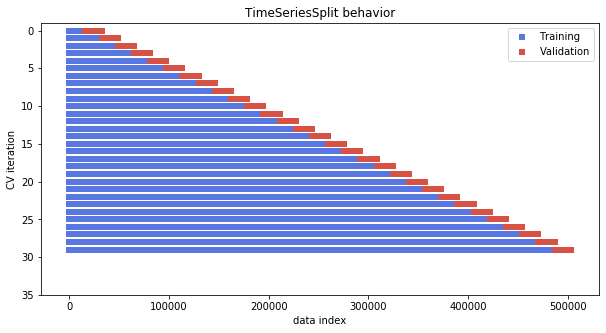

In [103]:
# Plot training and validation indices walk forward
from sklearn.model_selection import TimeSeriesSplit
cv = TimeSeriesSplit(n_splits=30)
fig, ax = plt.subplots(figsize=(10, 5))
for ii, (tr, tt) in enumerate(cv.split(x_train, y_train)):
# Plot training and test indices
    l1 = ax.scatter(tr, [ii] * len(tr), c=[plt.cm.coolwarm(.1)],
    marker='_', lw=6)
    l2 = ax.scatter(tt, [ii] * len(tt), c=[plt.cm.coolwarm(.9)],
    marker='_', lw=6)
    ax.set(ylim=[35, -1], title='TimeSeriesSplit behavior',
    xlabel='data index', ylabel='CV iteration')
    ax.legend([l1, l2], ['Training', 'Validation'])

In [104]:
#Building baseline model
from sklearn.metrics import mean_absolute_error

In [105]:
# "Learn" the mean from the training data
mean_train = np.mean(y_train)

In [106]:
# Get predictions on the test set
baseline_predictions = np.ones(y_test.shape) * mean_train

In [107]:
# Compute MAE
mae_baseline = mean_absolute_error(y_test, baseline_predictions)
print("Baseline MAE is {:.2f}".format(mae_baseline))

Baseline MAE is 0.39


In [108]:
df_train.head()

,prod_id_x,cat_code_x,unitprice_x,qty_x,year_x,dayofweek_x,quarter_x,month_x,dayofyear_x,dayofmonth_x,weekofyear_x,hourofday_x,minofday_x,is_month_end_x,is_month_start_x,is_year_start_x,is_year_end_x,minofday_y,cluster
date,,,,,,,,,,,,,,,,,,,
2016-03-17 10:18:47,2036,34,2.99,1.244,2016,3,1,3,77,17,11,10,18,0,0,0,0,18,0
2016-03-17 10:18:47,1037,25,20.00,0.164,2016,3,1,3,77,17,11,10,18,0,0,0,0,18,0
2016-03-17 10:21:57,1021,39,1.20,0.844,2016,3,1,3,77,17,11,10,21,0,0,0,0,21,0
2016-03-17 10:21:57,1037,25,20.00,0.072,2016,3,1,3,77,17,11,10,21,0,0,0,0,21,0
2016-03-17 10:21:57,1033,27,2.50,0.334,2016,3,1,3,77,17,11,10,21,0,0,0,0,21,0


In [109]:
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6],
              'min_child_weight': [4,5,6],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [100]}

cv1 = TimeSeriesSplit(n_splits=10)
for ii,(tr, tt) in enumerate(cv1.split(x_train, y_train)):
    # Fit the model on training data
    trn_x, trn_y = x_train.iloc[tr], y_train[tr]
    val_x, val_y = x_train.iloc[tt], y_train[tt]
    trn_y=np.nan_to_num(trn_y)
    val_y=np.nan_to_num(val_y)
    eval_s = [(x_train, y_train),(val_x, val_y)]

    #fitted_model = gs.fit(trn_x, trn_y,eval_set=eval_s,early_stopping_rounds=50, verbose=500)
    xgb1 = XGBRegressor()
    
    xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = -1,
                        verbose=False)

    xgb_grid.fit(trn_x, trn_y)
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

KeyboardInterrupt: 

In [ ]:
x_train.info()

In [113]:
import xgboost as xgb
from sklearn import metrics
oof_preds = np.zeros(x_train.shape[0])
sub_preds = np.zeros(x_test.shape[0])
results = []
error = []
cv = TimeSeriesSplit(n_splits=30)
feat_label = ['prod_id_x','cat_code_x','unitprice_x','year_x','dayofweek_x',
                 'quarter_x','month_x','dayofyear_x','dayofmonth_x','weekofyear_x','hourofday_x','is_month_end_x',
                      'is_month_start_x','is_year_start_x','is_year_end_x','cluster']
for ii,(tr, tt) in enumerate(cv.split(x_train, y_train)):
    # Fit the model on training data
    trn_x, trn_y = x_train.iloc[tr], y_train[tr]
    val_x, val_y = x_train.iloc[tt], y_train[tt]
    trn_y=np.nan_to_num(trn_y)
    val_y=np.nan_to_num(val_y)
    eval_s = [(x_train, y_train),(val_x, val_y)]
    model = xgb.XGBRegressor(n_jobs=-1, colsample_bytree=0.7, 
                             learning_rate=0.07, max_depth=7, 
                             min_child_weight=4, n_estimators=100, 
                             nthread=4, objective='reg:linear', 
                             silent=1, subsample=0.7)
    
    model.fit(trn_x, trn_y,eval_set=eval_s,early_stopping_rounds=20, verbose=500)
    
    feature_importance_xgb = (feat_label,model.feature_importances_)
    
    oof_preds = model.predict(val_x)
    results.append((oof_preds))
    error.append(metrics.mean_absolute_error(val_y,oof_preds))
    sub_preds+=model.predict(x_test)/cv.n_splits

[0]	validation_0-rmse:0.621827	validation_1-rmse:0.6343
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 20 rounds.
Stopping. Best iteration:
[32]	validation_0-rmse:0.436356	validation_1-rmse:0.444338

[0]	validation_0-rmse:0.625598	validation_1-rmse:0.656844
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 20 rounds.
Stopping. Best iteration:
[67]	validation_0-rmse:0.426557	validation_1-rmse:0.441718

[0]	validation_0-rmse:0.623523	validation_1-rmse:0.649401
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 20 rounds.
[99]	validation_0-rmse:0.418682	validation_1-rmse:0.434086
[0]	validation_0-rmse:0.624428	validation_1-rmse:0.625019
Multiple eval metrics have been passed: 'validation_1-rmse' wi

Will train until validation_1-rmse hasn't improved in 20 rounds.
[99]	validation_0-rmse:0.394638	validation_1-rmse:0.399261


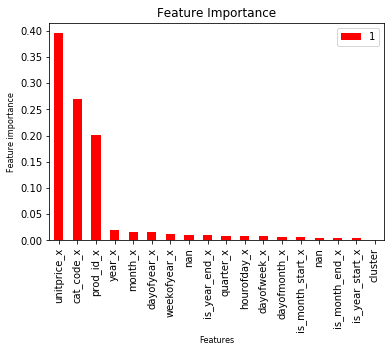

In [114]:
imp=pd.DataFrame(list(feature_importance_xgb))
imp=imp.transpose()
imp = imp.sort_values(by=[1], ascending=False)
#imp.head()
imp.plot(kind='bar',x=0,y=1,color='red')
plt.xlabel('Features', fontsize=8)
plt.ylabel('Feature importance', fontsize=8)
plt.title('Feature Importance')
plt.show()

In [115]:
error
errors_=pd.DataFrame(error).head()

In [116]:
print("Training MAE: ", errors_[0].mean())

Training MAE:  0.2913429278674692


In [117]:
sub_preds

array([0.98381126, 0.98388538, 0.76792636, ..., 0.48928535, 0.66316305,
       1.20217308])

In [119]:
pr=pd.DataFrame(sub_preds)
pr.index = x_test.index
pr.columns = ["Prediction"]
predDf = x_test.merge(pr, left_index=True, right_index=True)
predDfcomp = predDf.merge(y_test,left_index=True, right_index=True)
predDfcomp['Absolute Error'] = predDfcomp.apply(lambda row: (row['qty_x'] -row['Prediction']), axis=1)
#predDfcomp.to_csv("prediction_results_xgboost.csv")
predDfcomp.head()

,prod_id_x,cat_code_x,unitprice_x,year_x,dayofweek_x,quarter_x,month_x,dayofyear_x,dayofmonth_x,weekofyear_x,...,minofday_x,is_month_end_x,is_month_start_x,is_year_start_x,is_year_end_x,minofday_y,cluster,Prediction,qty_x,Absolute Error
date,,,,,,,,,,,,,,,,,,,,,
2019-01-02 08:09:57,2010,3,1.99,2019,2,1,1,2,2,1,...,9,0,0,0,0,9,0,0.983811,1.980,0.996189
2019-01-02 08:34:09,2010,3,1.99,2019,2,1,1,2,2,1,...,34,0,0,0,0,34,0,0.983885,1.082,0.098115
2019-01-02 08:34:09,2010,3,1.99,2019,2,1,1,2,2,1,...,34,0,0,0,0,34,0,0.983885,0.710,-0.273885
2019-01-02 08:34:09,2010,3,1.99,2019,2,1,1,2,2,1,...,34,0,0,0,0,34,0,0.983885,1.822,0.838115
2019-01-02 08:34:09,2010,3,1.99,2019,2,1,1,2,2,1,...,34,0,0,0,0,34,0,0.983885,0.718,-0.265885


In [120]:
predDfcomp['Absolute Error'].mean()

-0.010839497889747852

In [121]:
df_test['Prediction'] = model.predict(x_test)

In [122]:
df_test.head()

,prod_id_x,cat_code_x,unitprice_x,qty_x,year_x,dayofweek_x,quarter_x,month_x,dayofyear_x,dayofmonth_x,weekofyear_x,hourofday_x,minofday_x,is_month_end_x,is_month_start_x,is_year_start_x,is_year_end_x,minofday_y,cluster,Prediction
date,,,,,,,,,,,,,,,,,,,,
2019-01-02 08:09:57,2010,3,1.99,1.980,2019,2,1,1,2,2,1,8,9,0,0,0,0,9,0,1.021316
2019-01-02 08:34:09,2010,3,1.99,1.082,2019,2,1,1,2,2,1,8,34,0,0,0,0,34,0,1.014290
2019-01-02 08:34:09,4029,34,2.99,0.710,2019,2,1,1,2,2,1,8,34,0,0,0,0,34,0,0.831395
2019-01-02 08:34:09,2003,0,1.99,1.822,2019,2,1,1,2,2,1,8,34,0,0,0,0,34,0,0.928687
2019-01-02 08:34:09,1113,35,2.99,0.718,2019,2,1,1,2,2,1,8,34,0,0,0,0,34,0,0.657994


In [123]:
df_test['Var'] = df_test['qty_x'] - df_test['Prediction']

In [124]:
df_test['Var'].mean()

0.011133121339470517

In [125]:
df_test.head()

,prod_id_x,cat_code_x,unitprice_x,qty_x,year_x,dayofweek_x,quarter_x,month_x,dayofyear_x,dayofmonth_x,...,hourofday_x,minofday_x,is_month_end_x,is_month_start_x,is_year_start_x,is_year_end_x,minofday_y,cluster,Prediction,Var
date,,,,,,,,,,,,,,,,,,,,,
2019-01-02 08:09:57,2010,3,1.99,1.980,2019,2,1,1,2,2,...,8,9,0,0,0,0,9,0,1.021316,0.958684
2019-01-02 08:34:09,2010,3,1.99,1.082,2019,2,1,1,2,2,...,8,34,0,0,0,0,34,0,1.014290,0.067710
2019-01-02 08:34:09,4029,34,2.99,0.710,2019,2,1,1,2,2,...,8,34,0,0,0,0,34,0,0.831395,-0.121395
2019-01-02 08:34:09,2003,0,1.99,1.822,2019,2,1,1,2,2,...,8,34,0,0,0,0,34,0,0.928687,0.893313
2019-01-02 08:34:09,1113,35,2.99,0.718,2019,2,1,1,2,2,...,8,34,0,0,0,0,34,0,0.657994,0.060006


In [126]:
df_test.to_csv('XGBoost_preds_updated_newdata.csv')